In [1]:
## Imports
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [29]:
## Load dataframe
# resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/CarbonMonoxideData/treecodeApproxError3/'
resultsDir='/Users/nathanvaughn/Documents/synchronizedDataFiles/paperData/CarbonMonoxideData/treecodeApproxError_sizeCheck_titan/'
file='runComparison.csv'
df = pd.read_csv(resultsDir+file, header=0)
df = df.loc[df['treecodeOrder']!=0]

## Set Direct Sum values
# TotalEnergy = -113.9339953625
# BandEnergy = -64.2042006799 
# HartreeEnergy = 76.3637679069
# ExchangeEnergy = 0.0
# CorrelationEnergy = 0.0
# KineticEnergy = 0.0

# # Direct sum computed with tight tolerance as well. 
# TotalEnergy = -113.9340079923
# BandEnergy = -64.2042031442 
# HartreeEnergy = 76.3637784007
# ExchangeEnergy = 0.0
# CorrelationEnergy = 0.0
# KineticEnergy = 0.0

# Direct sum computed with tight tolerance as well. 
TotalEnergy = -112.47323
BandEnergy = -64.2042031442 
HartreeEnergy = 76.3637784007
ExchangeEnergy = 0.0
CorrelationEnergy = 0.0
KineticEnergy = 0.0

## Fill error arrays

df['absBandEnergyError'] = abs( df['BandEnergy'] - BandEnergy)
df['absExchangeEnergyError'] = abs( df['ExchangeEnergy'] - ExchangeEnergy)
try: 
    df['absHartreeEnergyError'] = abs( df['HartreeEnergy'] - HartreeEnergy)
except Exception as e:
    print(e, ' not present.')
df['absCorrelationEnergyError'] = abs( df['CorrelationEnergy'] - CorrelationEnergy)
df['absTotalEnergyError'] = abs( df['TotalEnergy'] - TotalEnergy)
df['absKineticEnergyError'] = abs( df['KineticEnergy'] - KineticEnergy)
try: 
    df['absElectrostaticEnergyError'] = abs( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
except Exception as e:
    print(e, ' not present.')
    
df['BandEnergyError'] = ( df['BandEnergy'] - BandEnergy)
df['ExchangeEnergyError'] = ( df['ExchangeEnergy'] - ExchangeEnergy)
try: 
    df['HartreeEnergyError'] = ( df['HartreeEnergy'] - HartreeEnergy)
except Exception as e:
    print(e, ' not present.')
df['CorrelationEnergyError'] = ( df['CorrelationEnergy'] - CorrelationEnergy)
df['TotalEnergyError'] = ( df['TotalEnergy'] - TotalEnergy)
df['KineticEnergyError'] = ( df['KineticEnergy'] - KineticEnergy)
try: 
    df['ElectrostaticEnergyError'] = ( df['ElectrostaticEnergy'] - ElectrostaticEnergy)
except Exception as e:
    print(e, ' not present.')

'ElectrostaticEnergy'  not present.
'ElectrostaticEnergy'  not present.


In [30]:
## Plotting functions
def treecodeAfterFirstSCF(df,A,B,C,save=False):
    

    fig, ax = plt.subplots(figsize=(8,6))
    df = df.sort_values(by=B)
    grouped = df.groupby(C)
#     grouped.sort_values(C, ascending=False)
    for name,group in grouped:
        if isinstance(name,str):
            group.plot(x=B, y=A, style='-o',markerSize=6, ax=ax, logy=True,label='%s = %s'%(C,name))
        elif isinstance(name,float):
            group.plot(x=B, y=A, style='-o',markerSize=6, ax=ax, logy=True,label='%s = %1.2f'%(C,name))
        elif isinstance(name,int):
            group.plot(x=B, y=A, style='-o',markerSize=6, ax=ax, logy=True,label='Order %i'%(name))
    plt.legend() 
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
#     plt.xlabel(r'$\theta$')
    plt.xlabel(r'$\theta$')
#     plt.xlabel('Polynomial Order')
    plt.ylabel('Energy Error (Hartree)') 
    
#     plt.xlim([0.25, 1.0])
    plt.ylim([3e-10,1e-3])
#     plt.grid()
    
#     df.plot(x=B,y=C,style='o')

    if save != False:
        saveID = save
        plt.savefig(saveID+'.png', bbox_inches='tight',format='png')
    plt.show()

<IPython.core.display.Javascript object>


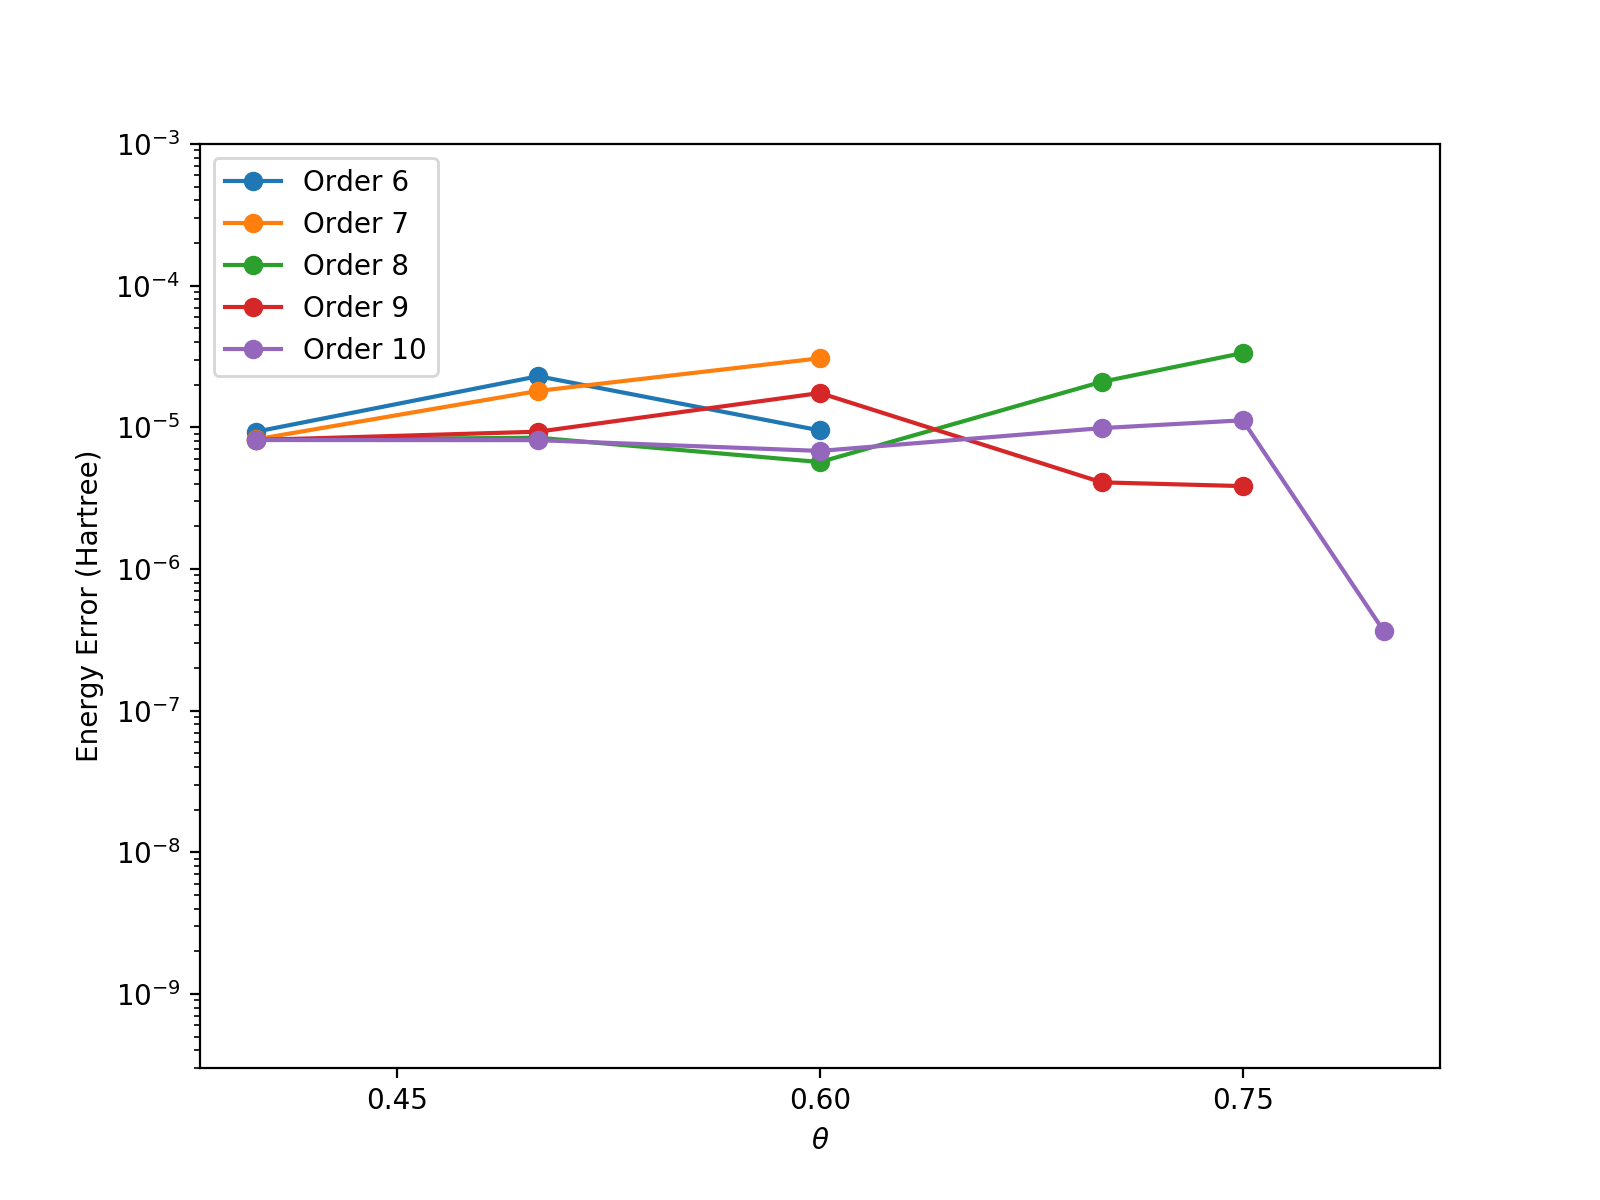

In [31]:
# treecodeAfterFirstSCF(df,'absBandEnergyError', 'theta', 'treecodeOrder')
# treecodeAfterFirstSCF(df,'absHartreeEnergyError', 'theta', 'treecodeOrder')
# treecodeAfterFirstSCF(df,'absTotalEnergyError', 'theta', 'treecodeOrder')
treecodeAfterFirstSCF(df,'absTotalEnergyError', 'theta','treecodeOrder',save='treecode-approx-error')
# df

In [4]:
df;

NameError: name 'df' is not defined